# Урок: Keras

## Задание

Используя набор примеров fashion-MNIST, описать какой результат получен в нейросети в зависимости от:
* числа нейронов в слое(для 2-хслойной сети)
* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров); фиксируйте для тренировочного и тестового набора метрики accuracy
* проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1; фиксируйте для тренировочного и тестового набора метрики accuracy
* сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?
* для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность). Сделайте вывод.

## Импорт библиотек

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report

## Загрузка данных

In [8]:
(train_imagesi, train_labels), (test_imagesi, test_labels) = fashion_mnist.load_data()

# приведем изображение к диапазону (-1, 1)
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [9]:
print(f"Shape: {train_images.shape}")

Shape: (60000, 784)


## Функции

In [10]:
def get_model(name, input_shape, units, layers_num, optimizer):
  model = Sequential(name=name)
  model.add(Dense(units, activation='relu', input_shape=input_shape))

  for k in range(layers_num + 1):
    units_ = 10 + (10 - k) * 10
    model.add(Dense(units_, activation='relu'))

  model.add(Dense(10, activation='softmax'))
  model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )
  return model

In [11]:
def plot(train_loss, test_loss, title):
  plt.figure(figsize=(20,5))
  plt.plot(train_loss, label = 'train loss')
  plt.plot(test_loss, label = 'test loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.grid('On')
  plt.title(title)
  plt.show()

## Создание модели и перебор параметров

#1 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'adam', 'units': 64}


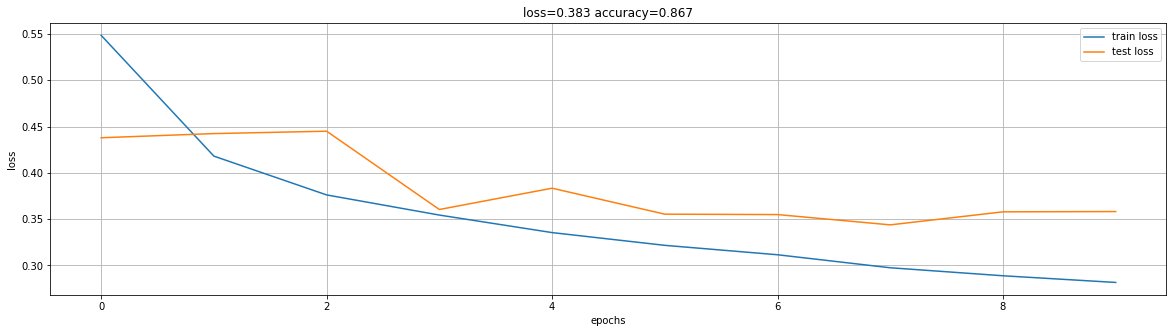

#2 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'adam', 'units': 128}


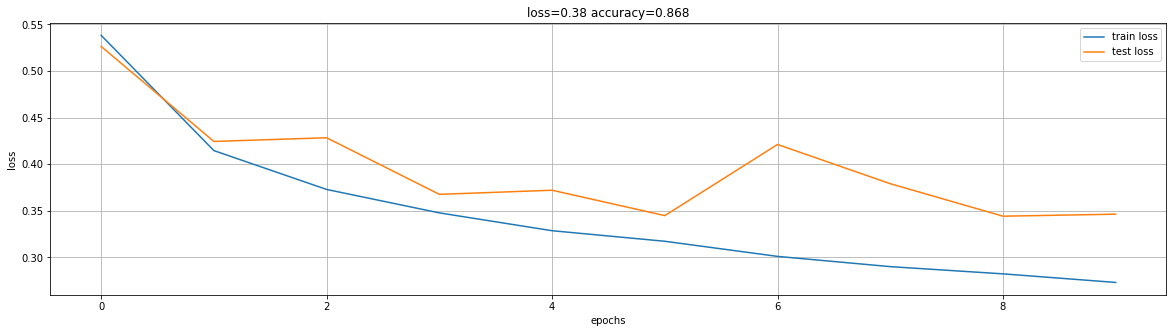

#3 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'sgd', 'units': 64}


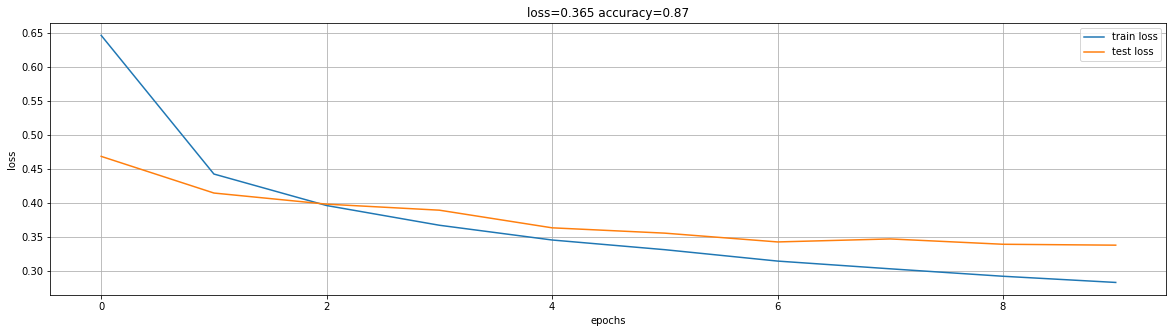

#4 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'sgd', 'units': 128}


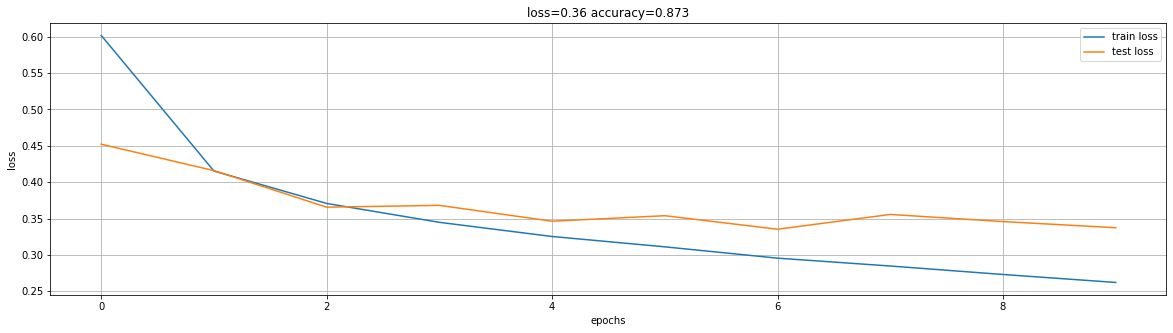

#5 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'rmsprop', 'units': 64}


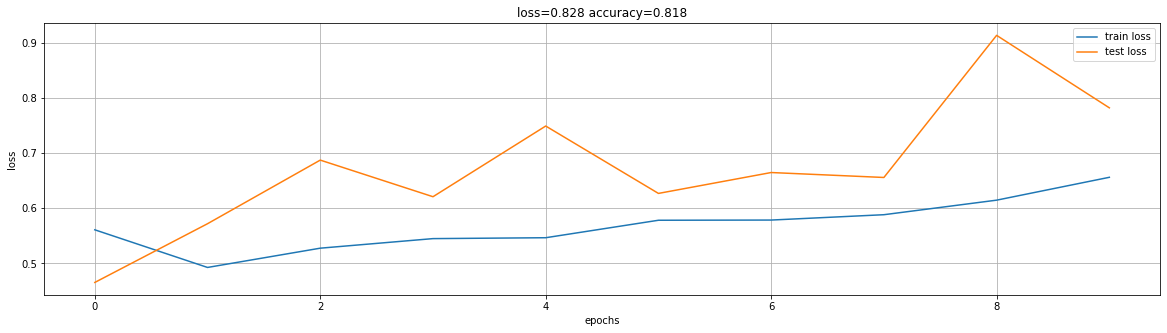

#6 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'rmsprop', 'units': 128}


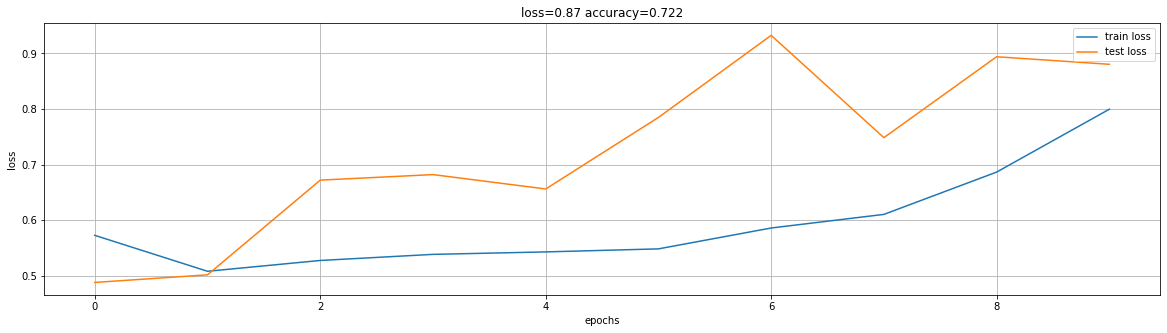

#7 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'nadam', 'units': 64}


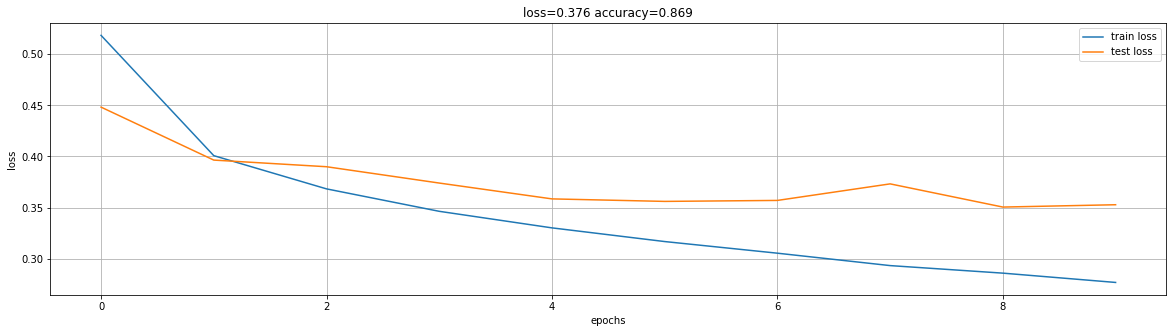

#8 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'nadam', 'units': 128}


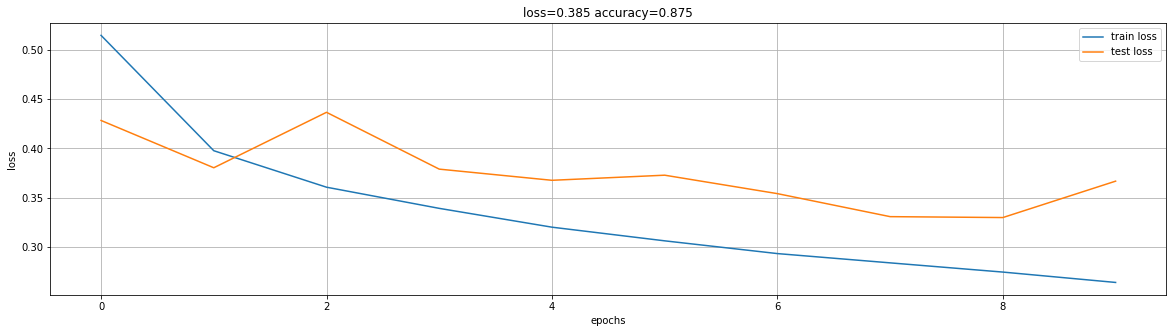

#9 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'adam', 'units': 64}


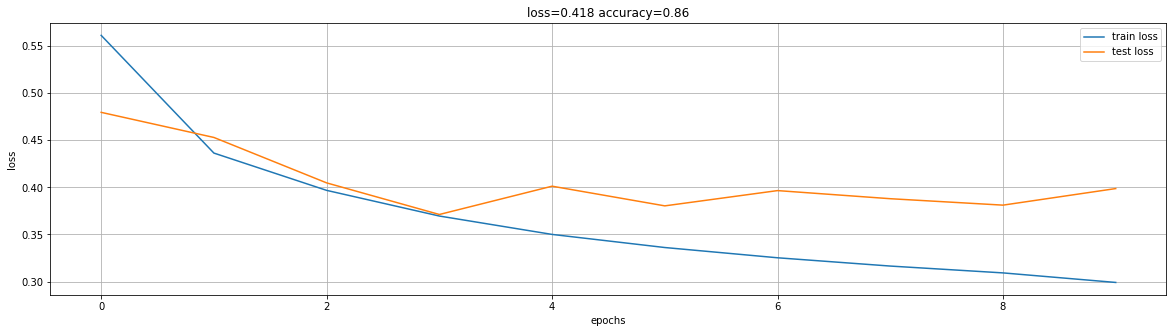

#10 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'adam', 'units': 128}


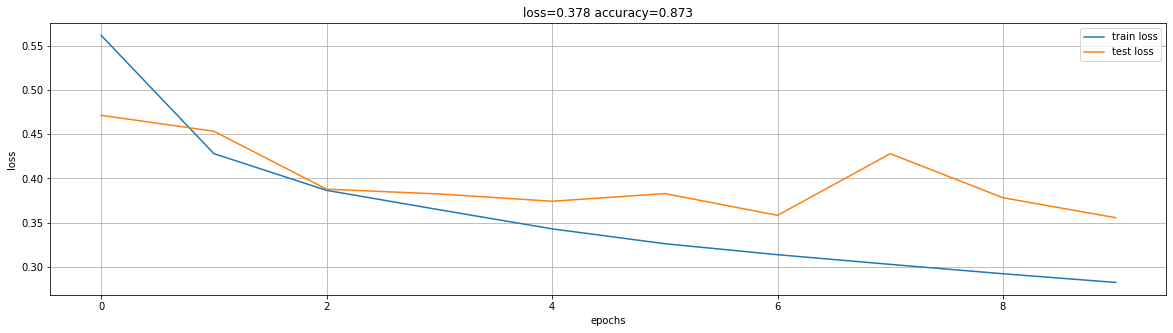

#11 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'sgd', 'units': 64}


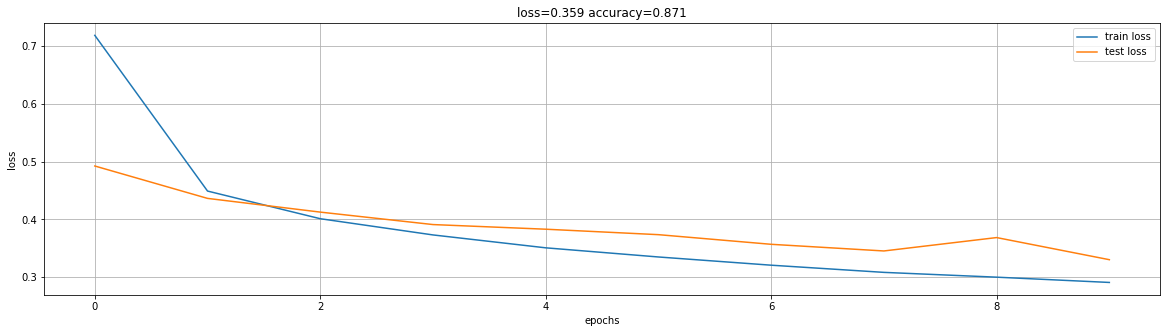

#12 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'sgd', 'units': 128}


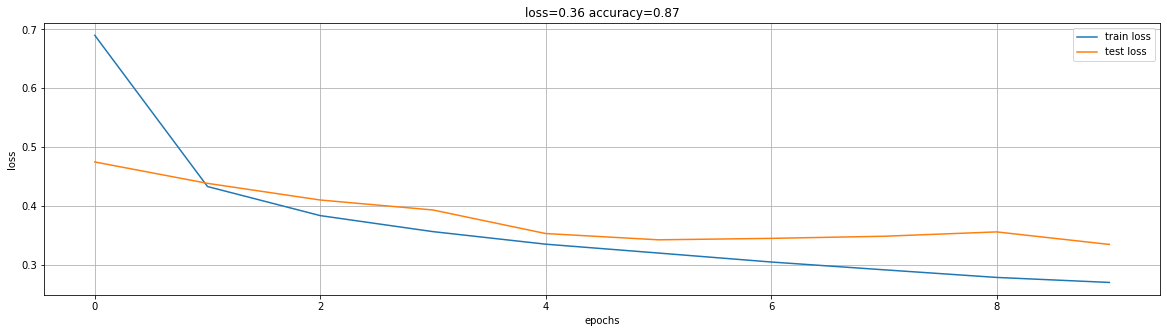

#13 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'rmsprop', 'units': 64}


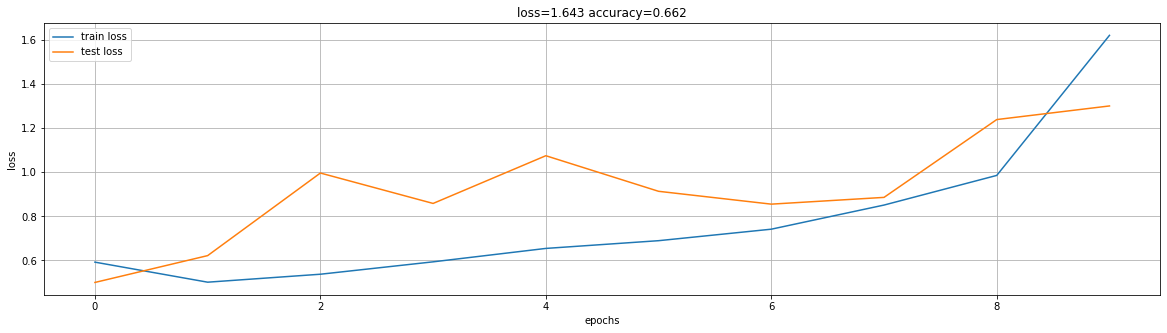

#14 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'rmsprop', 'units': 128}


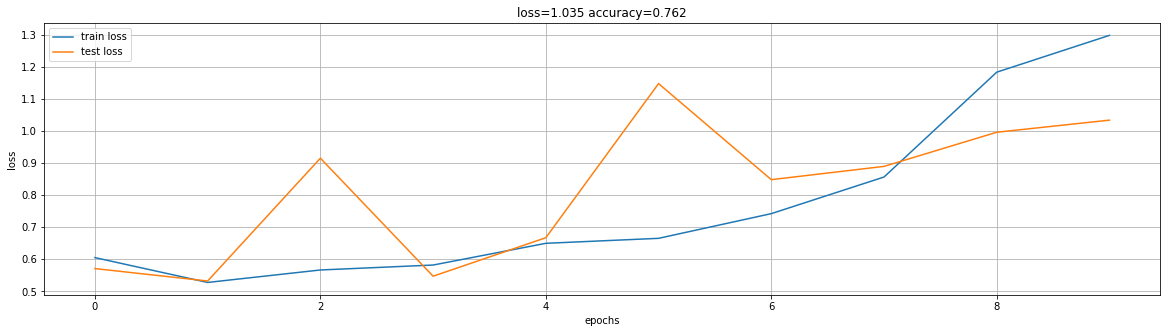

#15 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'nadam', 'units': 64}


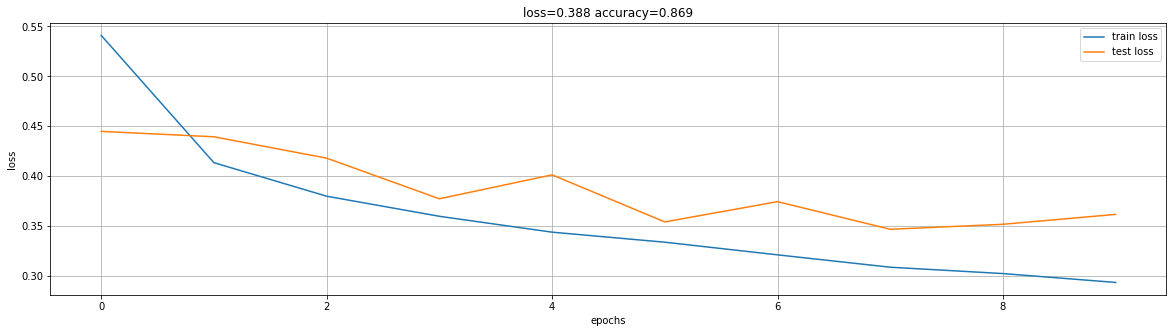

#16 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'nadam', 'units': 128}


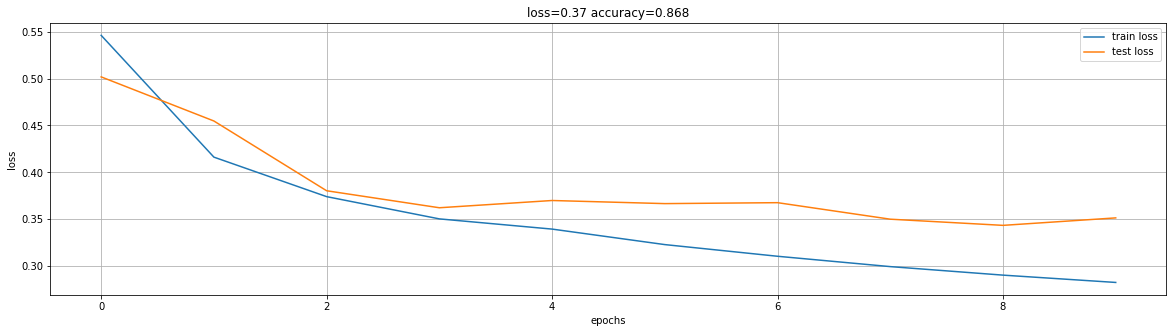

#17 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'adam', 'units': 64}


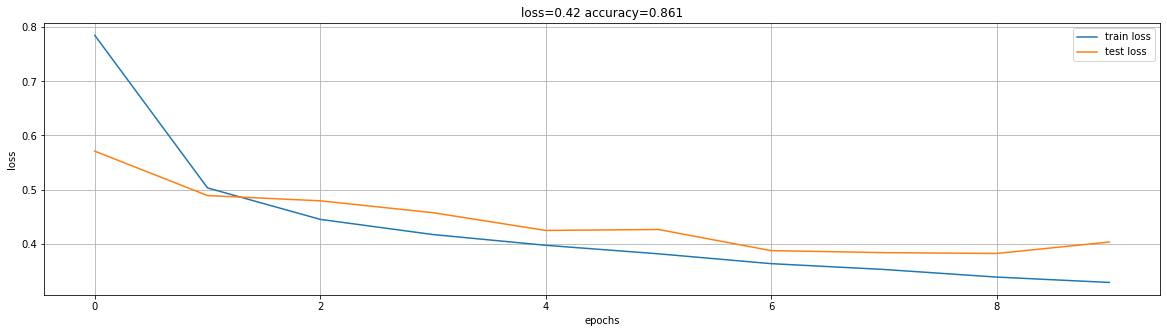

#18 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'adam', 'units': 128}


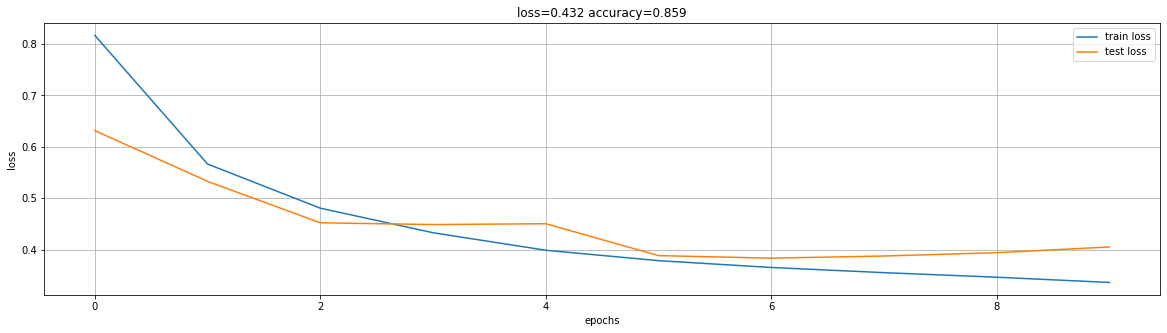

#19 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'sgd', 'units': 64}


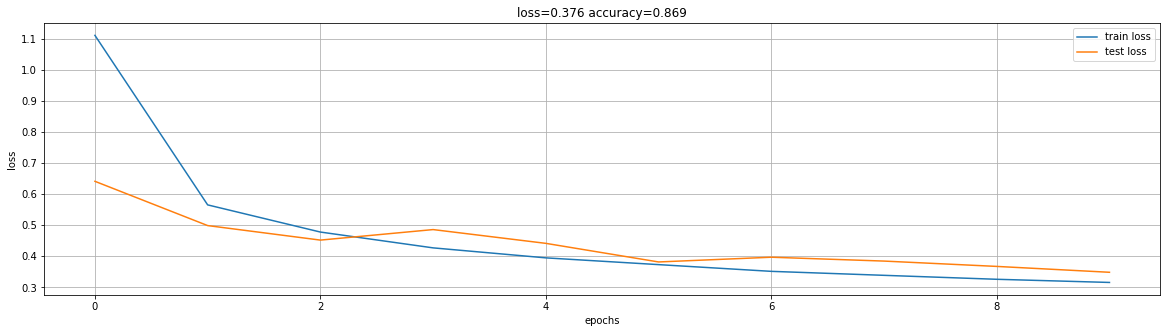

#20 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'sgd', 'units': 128}


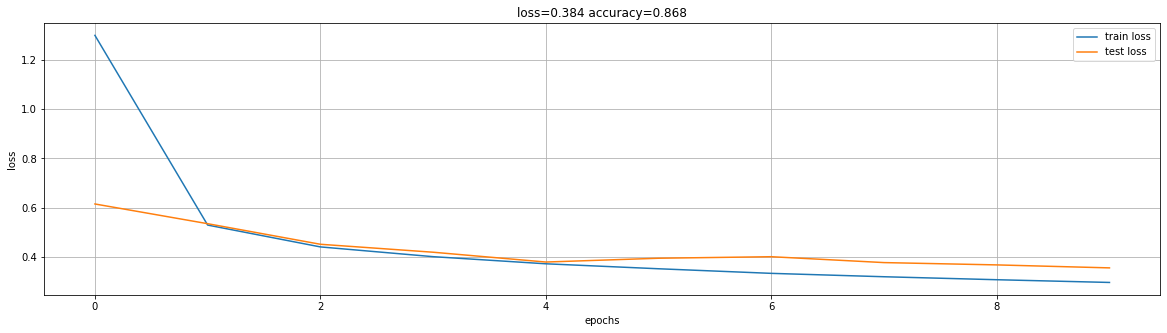

#21 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'rmsprop', 'units': 64}


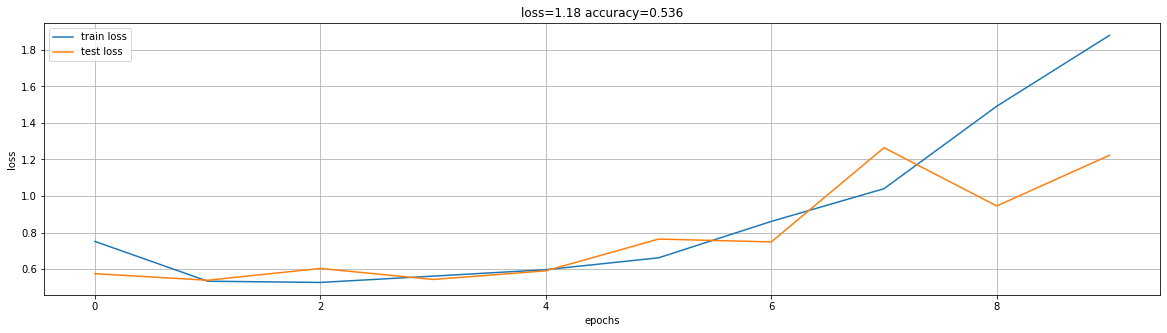

#22 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'rmsprop', 'units': 128}


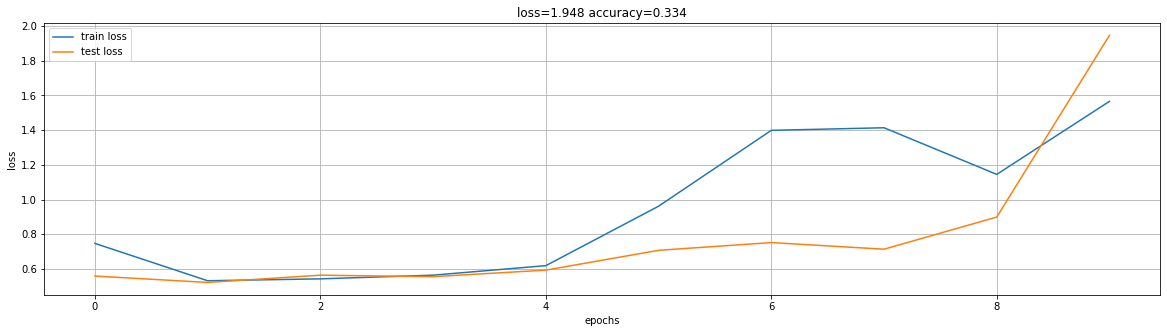

#23 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'nadam', 'units': 64}


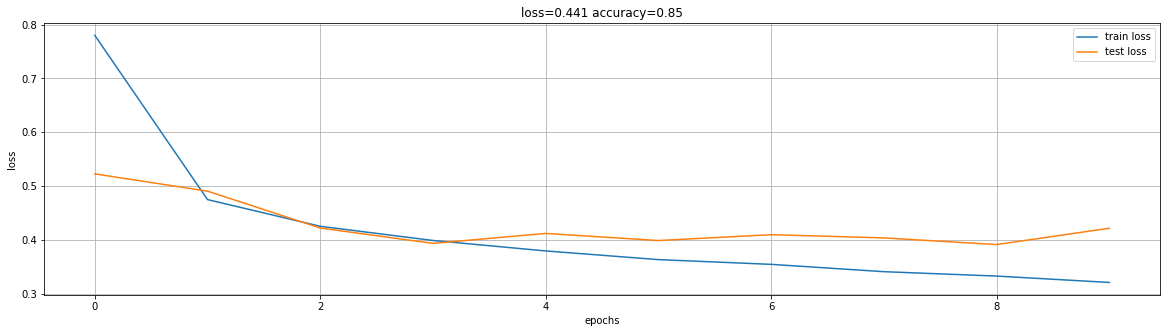

#24 from 24: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'nadam', 'units': 128}


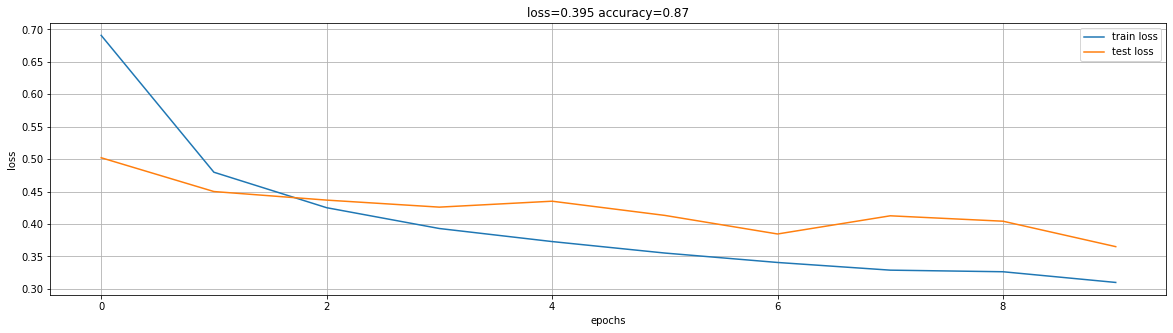

In [33]:
INPUT_SHAPE = (784,)

param_grid = {
    'units': [64, 128],
    'layers_num': [3, 5, 10],
    'optimizer': ['adam', 'sgd', 'rmsprop', 'nadam'],
    'batch_size': [16],
    'epochs': [10],
}

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

results: dict = dict()
grid: list = list(ParameterGrid(param_grid))
cnt: int = 0
for params in grid:
  cnt += 1
  print(f'#{cnt} from {len(grid)}: {params}')

  model = get_model(
    f'fashin_mnist_{cnt}',
    INPUT_SHAPE,
    params['units'],
    params['layers_num'],
    params['optimizer'],
  )
  
  # Train
  hh = model.fit(  
    train_images,
    y_train,
    epochs=params['epochs'],
    batch_size=params['batch_size'],
    validation_split=0.2,
    verbose=0,
  )

  # Evaluate
  result = model.evaluate(
    test_images,
    y_test,
    verbose=0,
  )

  results[cnt] = {
    'accuracy': result[1],
    'loss': result[0],
    'params': params
  }

  plot(hh.history['loss'], hh.history['val_loss'], f'loss={round(result[0], 3)} accuracy={round(result[1], 3)}')

## Лучшие параметры

In [34]:
results_sorted = pd.DataFrame.from_dict(results, orient='index').sort_values(by='accuracy', ascending=False)
results_sorted.head(5)

,accuracy,loss,params
8,0.8748,0.384519,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."
10,0.8734,0.378243,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."
4,0.8729,0.359856,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."
11,0.8714,0.358909,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."
12,0.8704,0.360472,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."


{'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'nadam', 'units': 128}

## Обучение финальной модели с оптимальными параметрами

In [37]:
final_model = get_model(
  'fashion_mnist',
  INPUT_SHAPE,
  units=128,
  layers_num=3,
  optimizer='nadam',
)

final_model.fit(  
  train_images,
  y_train,
  epochs=30,
  batch_size=128,
  validation_split=0.2,
)

Epoch 1/30
375/375 [==============================] - 3s 6ms/step - loss: 0.8051 - accuracy: 0.7105 - val_loss: 0.4173 - val_accuracy: 0.8482
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4070 - accuracy: 0.8496 - val_loss: 0.3783 - val_accuracy: 0.8602
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3384 - accuracy: 0.8749 - val_loss: 0.3764 - val_accuracy: 0.8622
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3123 - accuracy: 0.8853 - val_loss: 0.3606 - val_accuracy: 0.8665
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2902 - accuracy: 0.8909 - val_loss: 0.3334 - val_accuracy: 0.8804
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2716 - accuracy: 0.8983 - val_loss: 0.3286 - val_accuracy: 0.8795
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2607 - accuracy: 0.9006 - val_loss: 0.3318 - val_accuracy: 0.8816
Epoch 

## Валидация

In [38]:
  final_model.evaluate(
    test_images,
    y_test,
  )

313/313 [==============================] - 1s 2ms/step - loss: 0.4843 - accuracy: 0.8798


[0.48429086804389954, 0.879800021648407]

In [39]:
y_test_pred = final_model.predict(test_images)
y_test_pred = np.argmax(y_test_pred, axis=1)

print(classification_report(test_labels, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.78      0.79      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.84      0.81      1000
           5       0.98      0.95      0.97      1000
           6       0.71      0.67      0.69      1000
           7       0.89      0.98      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.99      0.91      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Классы, на которых модель чаще всего ошибается

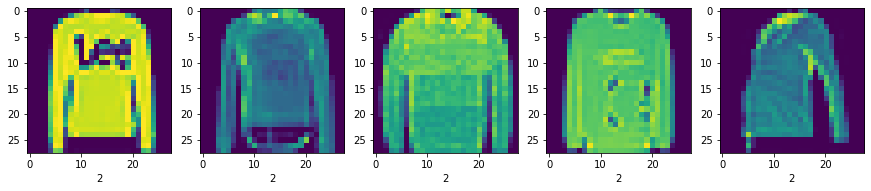

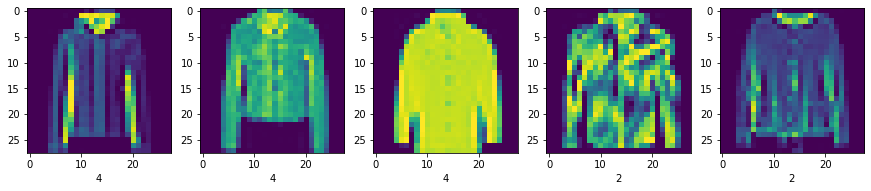

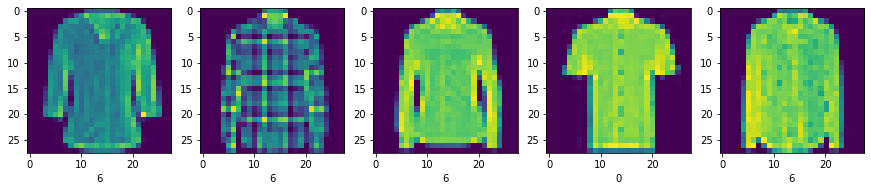

In [32]:
def plot_images(model, images, labels, N, y_class):
  y_test_N = images[labels == y_class][:N, :]
  y_test_pred_N = final_model.predict(y_test_N)
  y_test_pred_N = np.argmax(y_test_pred_N, axis=1)

  plt.figure(figsize =(3*N, 5))
  for i in range(N):
    plt.subplot(1, N, i+1)
    plt.imshow(y_test_N[i,:].reshape(28,28))
    plt.xlabel(str(y_test_pred_N[i]))
  plt.show()  

N = 5

plot_images(final_model, test_images, test_labels, N, 2)
plot_images(final_model, test_images, test_labels, N, 4)
plot_images(final_model, test_images, test_labels, N, 6)

## Вывод

Лучше всего модель показала себя с оптимизатором `nadam`.

В финальной модели было увеличено количество эпох и размер пакета, что еще немного увеличило метрику `accuracy` на тестовых данных - с 0.8748 до 0.8798.

Как видно, модель чаще всего ошибается на классах с похожими объектами.